<a href="https://colab.research.google.com/github/75andybermond/MnistSklearnProject/blob/main/NotebookMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.datasets import fetch_openml
from keras.datasets import mnist

from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

In [2]:
#les données
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
#reshape des images sous forme d'un vecteur
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # methode fit_transform perform the combinaison of fit method() and transform method()
X_test = scaler.transform(X_test) # transform() is use to apply the normalization on X_test 

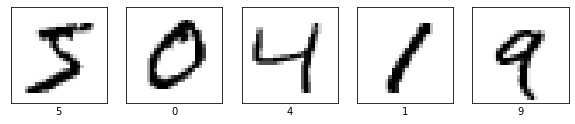

In [ ]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6,weights='distance')
knn.fit(X_train, y_train)
# Predict on dataset which model has not seen before
result=knn.predict(X_test)
print('Accuracy :',accuracy_score(y_test,result))
print(classification_report(y_test,result))

Accuracy : 0.9709
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
pickle.dump(knn, open('modelKNN.pkl', 'wb'))

MLP classifier 

In [ ]:
mlp_gs = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

In [ ]:
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 393, in _fit
    X, y = self._validate_input(X, y, 

ValueError: ignored

In [ ]:
print('Best parameters found:\n', clf.best_params_)

In [ ]:
y_true, y_pred = y_test , clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Train the model on the SVC Support vector Machines 

https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/ 

In [7]:
# train the model on train set
model = SVC()
model.fit(X_train, y_train)


SVC()

In [8]:
# get the score
scoring = model.score(X_train, y_train)
print("Training score: ", scoring) 

Training score:  0.9866333333333334


In [9]:
ypred = model.predict(X_test)

In [10]:
# score test 
model.score(X_test, y_test)

0.966

In [11]:
classification = classification_report(y_test, ypred)
print(classification)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [12]:

pickle.dump(model, open('modelSVCNorma.pkl', 'wb'))

In [ ]:
# defining parameter range
param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [1,0.1,0.001,0.0001],
              'kernel': ['rbf',  'linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)
  
# fitting the model for grid search
grid.fit(X_train, y_train)


In [ ]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.best_estimator_(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

In [13]:
# SVM SVC model 
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
# get the score
s = clf.score(X_train, y_train)
print("Training score: ", s) 

Training score:  0.9866333333333334


SGD Classifier 

In [ ]:
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
 
sgdc.fit(X_train, y_train)

SGDClassifier(tol=0.01)

In [ ]:
score = sgdc.score(X_train, y_train)
print("Training score: ", score) 


Training score:  0.8910333333333333


In [ ]:
ypred = sgdc.predict(X_test)

cm = confusion_matrix(y_test, ypred)
print(cm) 

[[ 935    0    3    6    2    2    8    1   17    6]
 [   0 1034    6    3    0    1    4    1   81    5]
 [   3    1  897   16    5    2   13    9   79    7]
 [   6    0   26  832    3   28    4   14   81   16]
 [   0    1    7    4  880    1    8    3   21   57]
 [  10    2    1   32   12  720   22    5   64   24]
 [  12    1    7    1    7   24  883    1   20    2]
 [   1    1   23    4   13    1    0  903   12   70]
 [   8    3    6   18   10   21    6    4  872   26]
 [   1    2    2    6   21    7    0   15   34  921]]


In [ ]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       980
           1       0.99      0.91      0.95      1135
           2       0.92      0.87      0.89      1032
           3       0.90      0.82      0.86      1010
           4       0.92      0.90      0.91       982
           5       0.89      0.81      0.85       892
           6       0.93      0.92      0.93       958
           7       0.94      0.88      0.91      1028
           8       0.68      0.90      0.77       974
           9       0.81      0.91      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000

